<a href="https://colab.research.google.com/github/ali2066k/DL_medical_imaging_tutorials/blob/main/edge_detection_classic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The gradient of a function $f(x, y)$ in a continuous domain is given by:
\begin{equation}
\nabla f = \left( \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right)
\end{equation}

However, in a discrete domain, we approximate the derivatives using finite differences. (To compute the discrete gradient of an image, we use finite differences in both horizontal and vertical directions. This is typically done using Sobel operators or central differences.)

# Forward Difference Approximation
For a discrete image $I(x, y)$, we approximate the gradient using forward differences:

Gradient in the $x$-direction (horizontal difference):
    \begin{equation}
    \frac{\partial I}{\partial x} \approx I(x+1, y) - I(x, y)
    \end{equation}
Gradient in the $y$-direction (vertical difference):
    \begin{equation}
    \frac{\partial I}{\partial y} \approx I(x, y+1) - I(x, y)
    \end{equation}
These approximations measure the rate of change between neighboring pixels.

# Central Difference Approximation
A more accurate method uses central differences:
Gradient in the $x$-direction:
    \begin{equation}
    \frac{\partial I}{\partial x} \approx \frac{I(x+1, y) - I(x-1, y)}{2}
    \end{equation}
Gradient in the $y$-direction:
    \begin{equation}
    \frac{\partial I}{\partial y} \approx \frac{I(x, y+1) - I(x, y-1)}{2}
    \end{equation}

This approach better estimates the gradient at the center of a pixel.

# Gradient Magnitude
The gradient magnitude is computed as:
\begin{equation}
|\nabla I| = \sqrt{\left( \frac{\partial I}{\partial x} \right)^2 + \left( \frac{\partial I}{\partial y} \right)^2}
\end{equation}
This represents the strength of edges in the image.

# Sobel Operator (Weighted Central Difference)
The Sobel filter is a common discrete approximation using convolution:
\begin{equation}
G_x =
\begin{bmatrix}
-1 & 0 & +1 \\
-2 & 0 & +2 \\
-1 & 0 & +1
\end{bmatrix}
\end{equation}

\begin{equation}
G_y =
\begin{bmatrix}
-1 & -2 & -1 \\
0 & 0 & 0 \\
+1 & +2 & +1
\end{bmatrix}
\end{equation}

The image is convolved with $G_x$ to get $\frac{\partial I}{\partial x}$.
The image is convolved with $G_y$ to get $\frac{\partial I}{\partial y}$.

The gradient magnitude is computed as:
\begin{equation}
|\nabla I| = \sqrt{G_x^2 + G_y^2}
\end{equation}

# Practical Session:

In [63]:
!pip install opencv-python

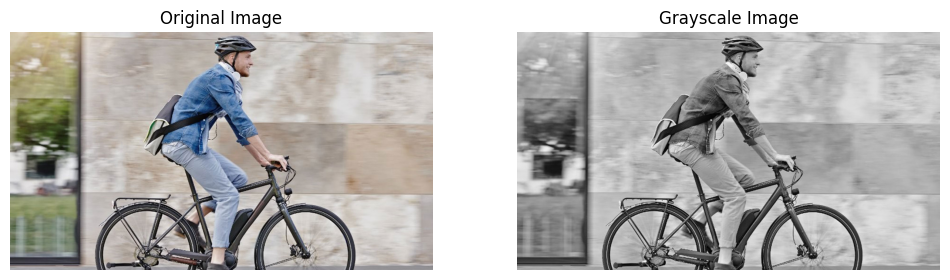

In [64]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
# image source: https://cdn.medizzy.com/c5kLjaN4sDlMHdykyCSpY7XmdBs=/300x297/img/posts/fc52f050-de19-4d6a-92f0-50de199d6af3
image_path = "/content/sample2.jpg"
"""Load both color and grayscale versions of an image."""
color_image = cv2.imread(image_path)  # Load in BGR format
if color_image is None:
    raise ValueError("Image not found. Check the path.")

grayscale_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY).astype(np.float32) / 255.0

# Convert BGR to RGB for proper visualization
color_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)

# Display the images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Original color image
axes[0].imshow(color_image)
axes[0].set_title("Original Image")
axes[0].axis('off')

# Grayscale image
axes[1].imshow(grayscale_image, cmap='gray')
axes[1].set_title("Grayscale Image")
axes[1].axis('off')

plt.show()

Here we want to compute the finite difference approximation

We use the numpy np.diff function to calculate the n-th discrete difference along the given axis. [Numpy Doc](https://numpy.org/doc/2.1/reference/generated/numpy.diff.html)

In [65]:
def compute_finite_difference_gradient(image):
    """
    Compute the gradient of an image using finite difference approximation.

    Args:
        image (numpy.ndarray): Grayscale image as a 2D numpy array.

    Returns:
        tuple: (dx, dy) where:
            - dx is the gradient in the x-direction.
            - dy is the gradient in the y-direction.
    """
    # Compute forward differences in x and y directions
    dx = np.diff(image, axis=1, append=image[:, -1][:, np.newaxis])  # Gradient in x-direction
    dy = np.diff(image, axis=0, append=image[-1, :][np.newaxis, :])  # Gradient in y-direction

    return dx, dy

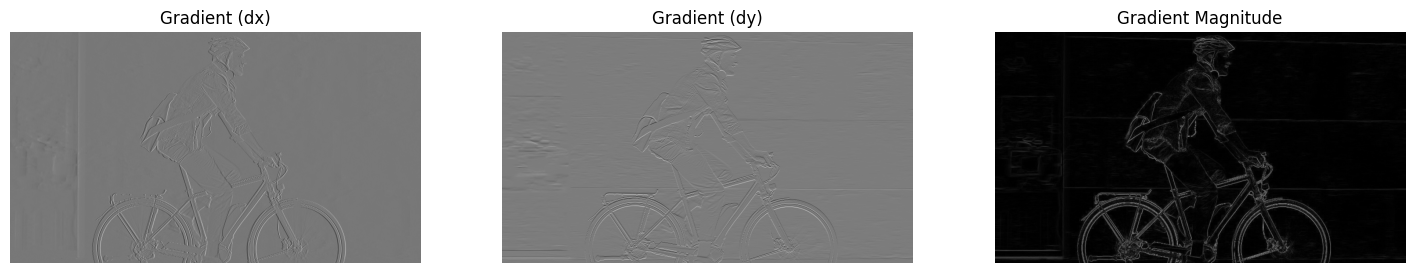

In [66]:
# Compute the gradients using finite difference approximation
dx, dy = compute_finite_difference_gradient(grayscale_image)

# Compute gradient magnitude
gradient_magnitude = np.sqrt(dx**2 + dy**2)

# Display the results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Gradient in x-direction
axes[0].imshow(dx, cmap='gray')
axes[0].set_title("Gradient (dx)")
axes[0].axis('off')

# Gradient in y-direction
axes[1].imshow(dy, cmap='gray')
axes[1].set_title("Gradient (dy)")
axes[1].axis('off')

# Gradient magnitude
axes[2].imshow(gradient_magnitude, cmap='gray')
axes[2].set_title("Gradient Magnitude")
axes[2].axis('off')

plt.show()

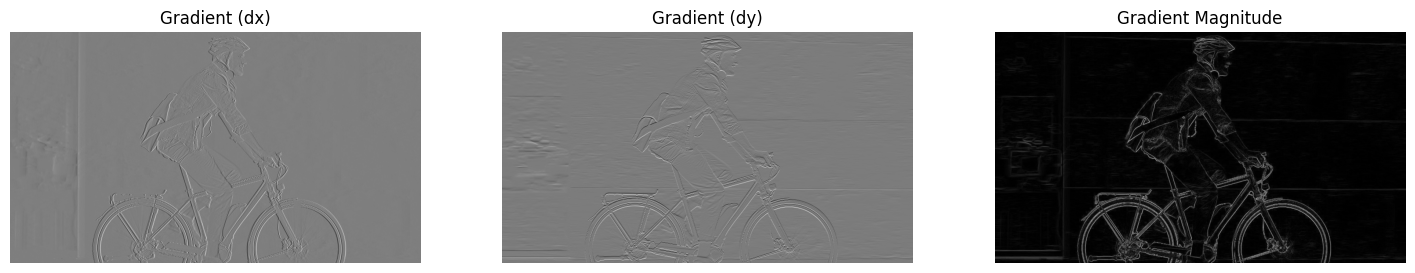

In [67]:
def compute_central_difference_gradient(image):
    """
    Compute the gradient of an image using central difference approximation.

    Args:
        image (numpy.ndarray): Grayscale image as a 2D numpy array.

    Returns:
        tuple: (dx, dy) where:
            - dx is the gradient in the x-direction.
            - dy is the gradient in the y-direction.
    """
    # Compute central differences in x and y directions
    dx = (np.roll(image, -1, axis=1) - np.roll(image, 1, axis=1)) / 2
    dy = (np.roll(image, -1, axis=0) - np.roll(image, 1, axis=0)) / 2

    # Set boundary values to zero (to avoid artifacts due to wrap-around)
    dx[:, 0] = dx[:, -1] = 0
    dy[0, :] = dy[-1, :] = 0

    return dx, dy

import matplotlib.pyplot as plt

# Compute the gradients using finite difference approximation
dx, dy = compute_central_difference_gradient(grayscale_image)

# Compute gradient magnitude
gradient_magnitude = np.sqrt(dx**2 + dy**2)

# Display the results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Gradient in x-direction
axes[0].imshow(dx, cmap='gray')
axes[0].set_title("Gradient (dx)")
axes[0].axis('off')

# Gradient in y-direction
axes[1].imshow(dy, cmap='gray')
axes[1].set_title("Gradient (dy)")
axes[1].axis('off')

# Gradient magnitude
axes[2].imshow(gradient_magnitude, cmap='gray')
axes[2].set_title("Gradient Magnitude")
axes[2].axis('off')

plt.show()

Let's compare them together

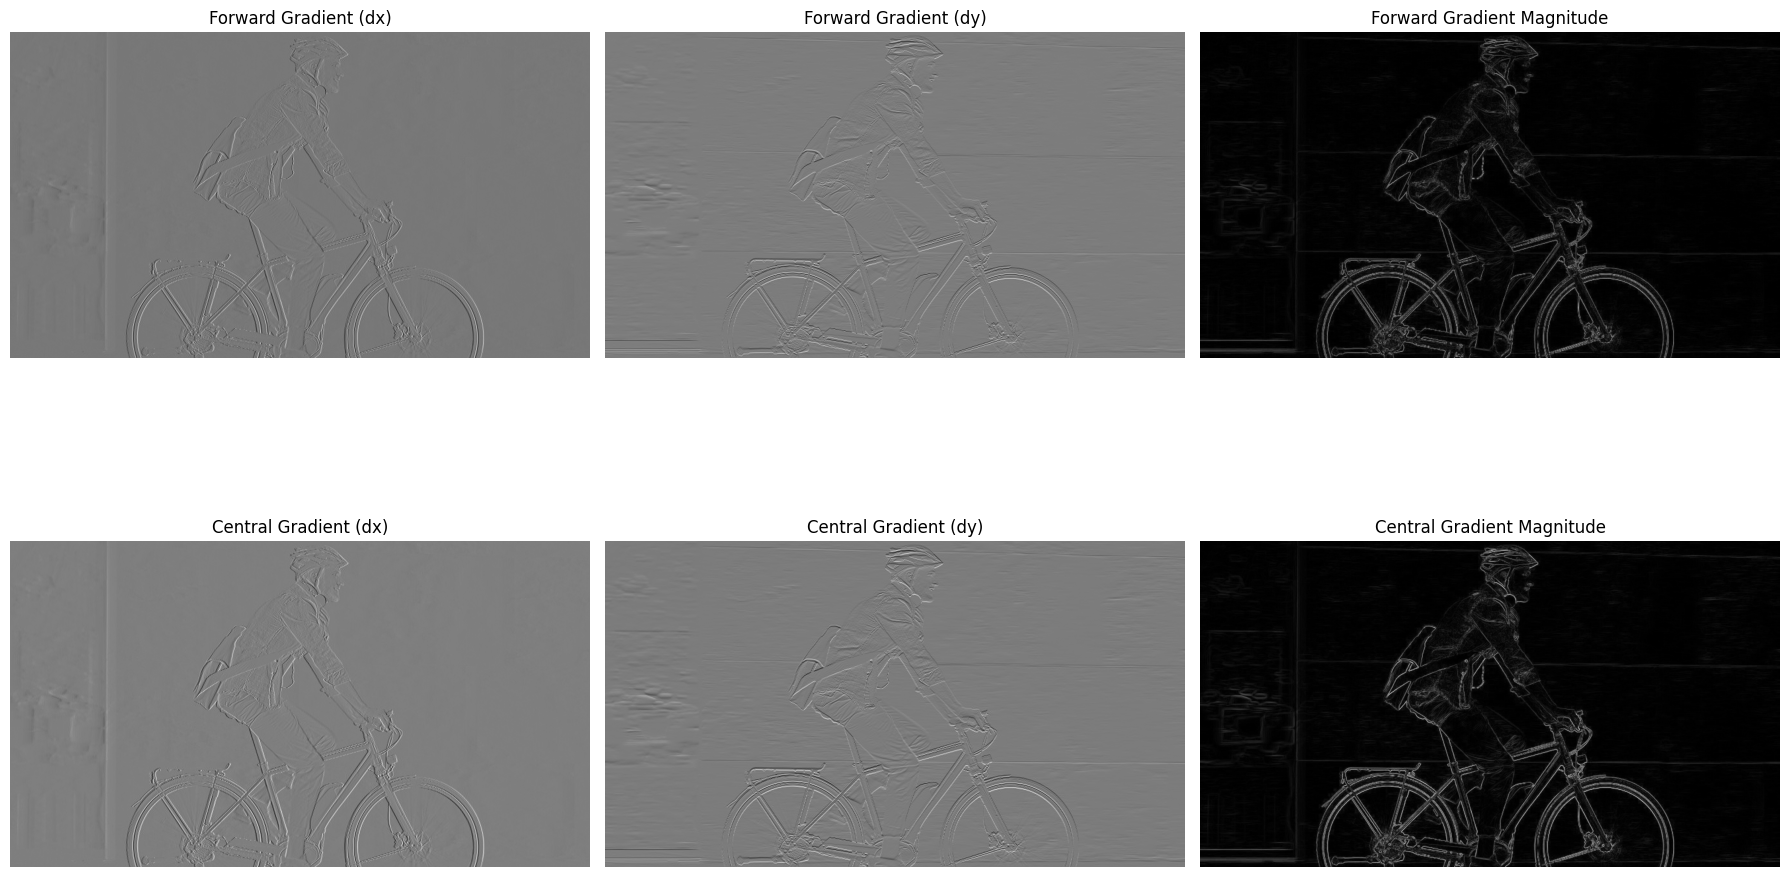

In [68]:
# Compute gradients using both forward difference and central difference approximations
dx_forward, dy_forward = compute_finite_difference_gradient(grayscale_image)
dx_central, dy_central = compute_central_difference_gradient(grayscale_image)

# Compute gradient magnitudes
grad_mag_forward = np.sqrt(dx_forward**2 + dy_forward**2)
grad_mag_central = np.sqrt(dx_central**2 + dy_central**2)

# Create subplots to visualize the results
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Titles for each row
titles = ["Gradient (dx)", "Gradient (dy)", "Gradient Magnitude"]

# First row: Forward Difference
axes[0, 0].imshow(dx_forward, cmap='gray')
axes[0, 0].set_title(f"Forward {titles[0]}")
axes[0, 0].axis('off')

axes[0, 1].imshow(dy_forward, cmap='gray')
axes[0, 1].set_title(f"Forward {titles[1]}")
axes[0, 1].axis('off')

axes[0, 2].imshow(grad_mag_forward, cmap='gray')
axes[0, 2].set_title(f"Forward {titles[2]}")
axes[0, 2].axis('off')

# Second row: Central Difference
axes[1, 0].imshow(dx_central, cmap='gray')
axes[1, 0].set_title(f"Central {titles[0]}")
axes[1, 0].axis('off')

axes[1, 1].imshow(dy_central, cmap='gray')
axes[1, 1].set_title(f"Central {titles[1]}")
axes[1, 1].axis('off')

axes[1, 2].imshow(grad_mag_central, cmap='gray')
axes[1, 2].set_title(f"Central {titles[2]}")
axes[1, 2].axis('off')

# Show the figure
plt.tight_layout()
plt.show()

Central difference approximation seems more accurate, right?

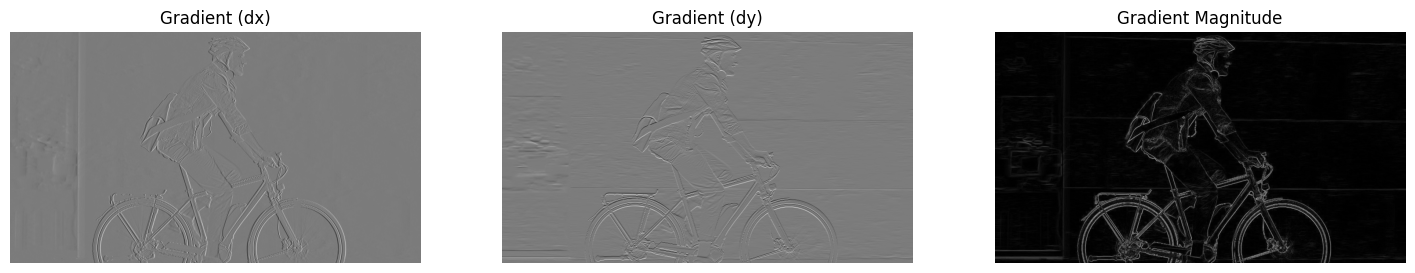

In [69]:
import cv2

def compute_sobel_gradient(image):
    """
    Compute the gradient of an image using the Sobel operator.

    Args:
        image (numpy.ndarray): Grayscale image as a 2D numpy array.

    Returns:
        tuple: (dx, dy, grad_magnitude) where:
            - dx is the gradient in the x-direction.
            - dy is the gradient in the y-direction.
            - grad_magnitude is the combined gradient magnitude.
    """
    # Compute Sobel gradients
    dx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Gradient in x-direction
    dy = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Gradient in y-direction

    # Compute gradient magnitude
    grad_magnitude = np.sqrt(dx**2 + dy**2)

    return dx, dy, grad_magnitude

dx, dy, grad_magnitude = compute_sobel_gradient(grayscale_image)

# Display the results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Gradient in x-direction
axes[0].imshow(dx, cmap='gray')
axes[0].set_title("Gradient (dx)")
axes[0].axis('off')

# Gradient in y-direction
axes[1].imshow(dy, cmap='gray')
axes[1].set_title("Gradient (dy)")
axes[1].axis('off')

# Gradient magnitude
axes[2].imshow(gradient_magnitude, cmap='gray')
axes[2].set_title("Gradient Magnitude")
axes[2].axis('off')

plt.show()

# Advanced Edge Detection Techniques
Beyond basic gradient-based methods like finite differences and Sobel operator, there are several more advanced edge detection techniques that provide better noise robustness, subpixel accuracy, and multi-scale edge detection. Below are some of the most widely used advanced edge detection methods:


# **1. Canny Edge Detector (Multi-Stage)**

The Canny edge detector is a widely used method that improves edge detection by applying multiple processing steps.

Steps:
1. Gaussian Blurring: Reduces noise in the image.
2. Gradient Computation: Uses the Sobel operator to compute the gradient in both x and y directions.
3. Non-Maximum Suppression: Removes weak edges that are not local maxima.
4. Hysteresis Thresholding:
    *   Two thresholds (low and high) are used.
    *   Strong edges (above high threshold) are retained.
    *   Weak edges (between thresholds) are connected to strong edges.


Implementation:

In [70]:
import cv2

def compute_canny_edges_cv2(image, low_threshold=50, high_threshold=150):
    """
    Compute edges using the Canny edge detector.

    Args:
        image (numpy.ndarray): Grayscale image.
        low_threshold (int): Lower threshold for hysteresis.
        high_threshold (int): Upper threshold for hysteresis.

    Returns:
        numpy.ndarray: Binary edge map.
    """
    edges = cv2.Canny((image * 255).astype(np.uint8), low_threshold, high_threshold)
    return edges

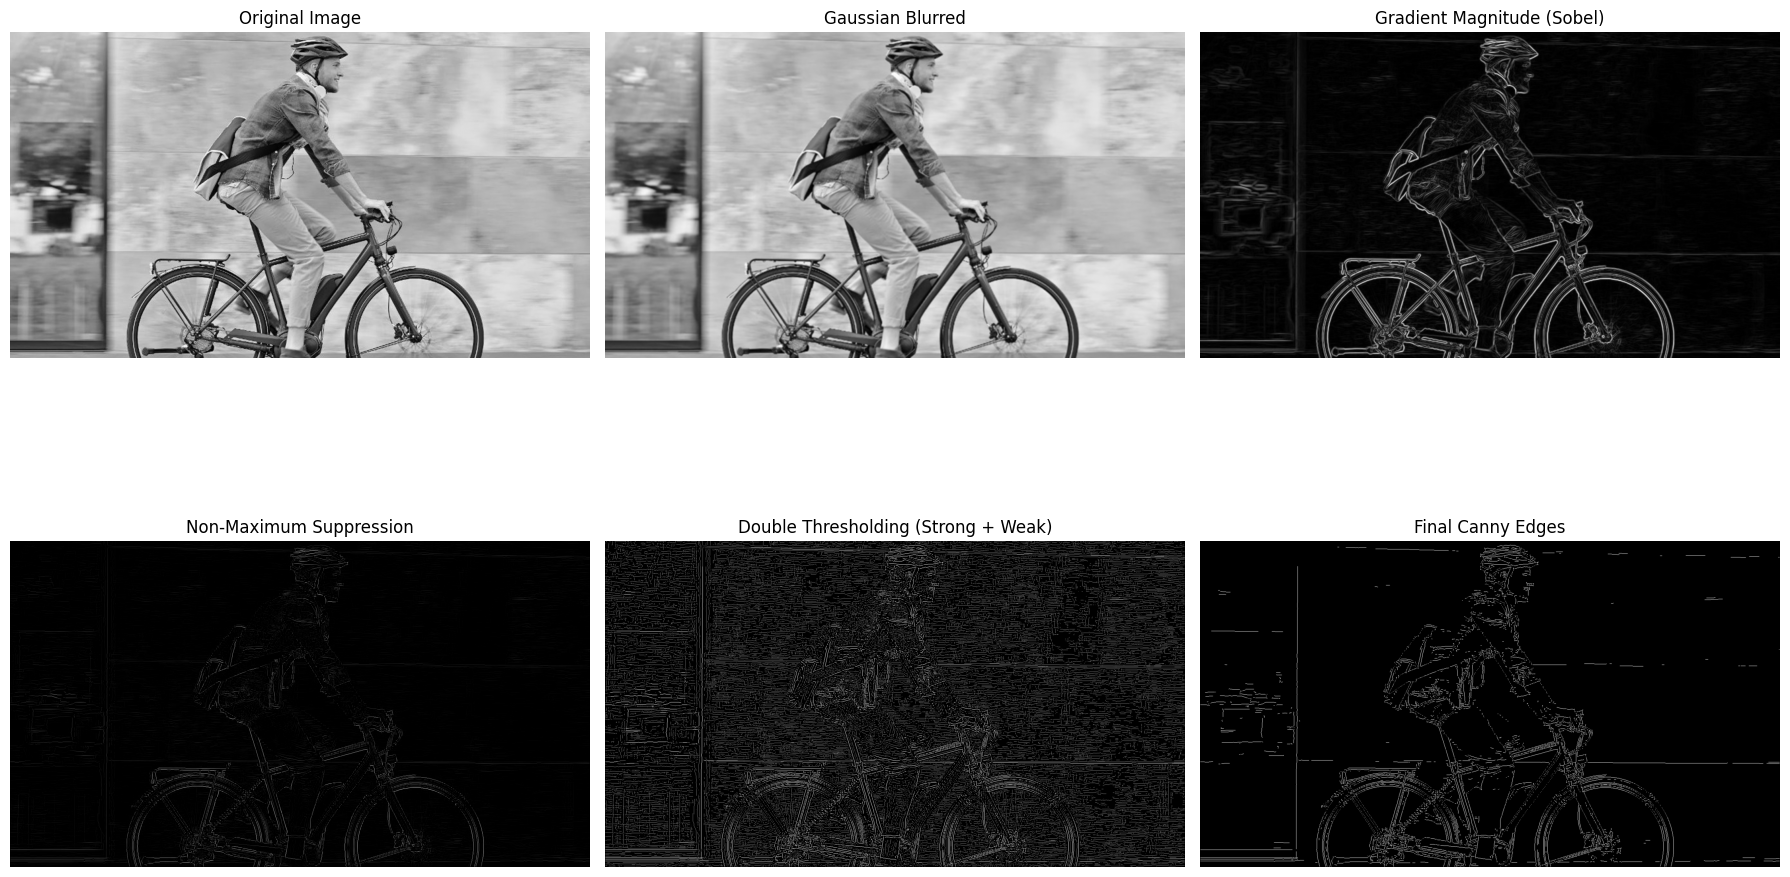

In [71]:
# Step 1: Apply Gaussian Blur
def apply_gaussian_blur(image, kernel_size=5, sigma=1.4):
    """Smooth the image using Gaussian Blur to reduce noise."""
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)

# Step 2: Compute Sobel Gradients
def compute_gradients(image):
    """Compute gradient magnitude and direction using Sobel operator."""
    dx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    dy = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    grad_magnitude = np.sqrt(dx**2 + dy**2)
    grad_direction = np.arctan2(dy, dx)  # Gradient direction in radians
    return grad_magnitude, grad_direction

# Step 3: Non-Maximum Suppression
def non_maximum_suppression(grad_mag, grad_dir):
    """Thin edges by keeping only local maxima along gradient direction."""
    rows, cols = grad_mag.shape
    suppressed = np.zeros((rows, cols), dtype=np.float32)
    angle = grad_dir * (180.0 / np.pi)  # Convert radian to degrees
    angle[angle < 0] += 180  # Normalize angles to range [0, 180]

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            q, r = 255, 255  # Default values for pixel neighbors

            # Edge direction quantization
            if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
                q, r = grad_mag[i, j + 1], grad_mag[i, j - 1]  # Horizontal edges
            elif (22.5 <= angle[i, j] < 67.5):
                q, r = grad_mag[i - 1, j + 1], grad_mag[i + 1, j - 1]  # Diagonal /
            elif (67.5 <= angle[i, j] < 112.5):
                q, r = grad_mag[i - 1, j], grad_mag[i + 1, j]  # Vertical edges
            elif (112.5 <= angle[i, j] < 157.5):
                q, r = grad_mag[i + 1, j + 1], grad_mag[i - 1, j - 1]  # Diagonal \

            # Keep only local maxima
            if grad_mag[i, j] >= q and grad_mag[i, j] >= r:
                suppressed[i, j] = grad_mag[i, j]
            else:
                suppressed[i, j] = 0

    return suppressed

# Step 4: Double Thresholding
def apply_double_threshold(image, low_threshold_ratio=0.05, high_threshold_ratio=0.15):
    """Apply double thresholding to classify pixels into strong, weak, and non-edges."""
    high_threshold = image.max() * high_threshold_ratio
    low_threshold = high_threshold * low_threshold_ratio

    strong_edges = (image >= high_threshold).astype(np.uint8)
    weak_edges = ((image >= low_threshold) & (image < high_threshold)).astype(np.uint8)

    return strong_edges, weak_edges

# Step 5: Edge Tracking by Hysteresis
def edge_tracking_by_hysteresis(strong_edges, weak_edges):
    """Connect weak edges to strong edges if they are connected."""
    edges = strong_edges.copy()
    rows, cols = edges.shape
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            if weak_edges[i, j] == 1:
                if (strong_edges[i-1:i+2, j-1:j+2].max() == 1):  # Check 8-connectivity
                    edges[i, j] = 1
    return edges

# Load Image
image_path = "/content/sample2.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE).astype(np.float32) / 255.0

# Apply Canny Edge Detection Steps
blurred_image = apply_gaussian_blur(image)
grad_magnitude, grad_direction = compute_gradients(blurred_image)
suppressed_image = non_maximum_suppression(grad_magnitude, grad_direction)
strong_edges, weak_edges = apply_double_threshold(suppressed_image)
final_canny_edges = edge_tracking_by_hysteresis(strong_edges, weak_edges)

# Visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title("Original Image")
axes[0, 0].axis('off')

axes[0, 1].imshow(blurred_image, cmap='gray')
axes[0, 1].set_title("Gaussian Blurred")
axes[0, 1].axis('off')

axes[0, 2].imshow(grad_magnitude, cmap='gray')
axes[0, 2].set_title("Gradient Magnitude (Sobel)")
axes[0, 2].axis('off')

axes[1, 0].imshow(suppressed_image, cmap='gray')
axes[1, 0].set_title("Non-Maximum Suppression")
axes[1, 0].axis('off')

axes[1, 1].imshow(strong_edges + weak_edges * 0.5, cmap='gray')
axes[1, 1].set_title("Double Thresholding (Strong + Weak)")
axes[1, 1].axis('off')

axes[1, 2].imshow(final_canny_edges, cmap='gray')
axes[1, 2].set_title("Final Canny Edges")
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

# 2. The Laplacian of Gaussian (LoG)
combines Gaussian smoothing and the Laplacian operator for edge detection.

Steps:
1. Gaussian Blurring: Reduces noise.
2. Laplacian Operator: Computes the second-order derivative for detecting zero-crossings, which indicate edges.

Implementation:

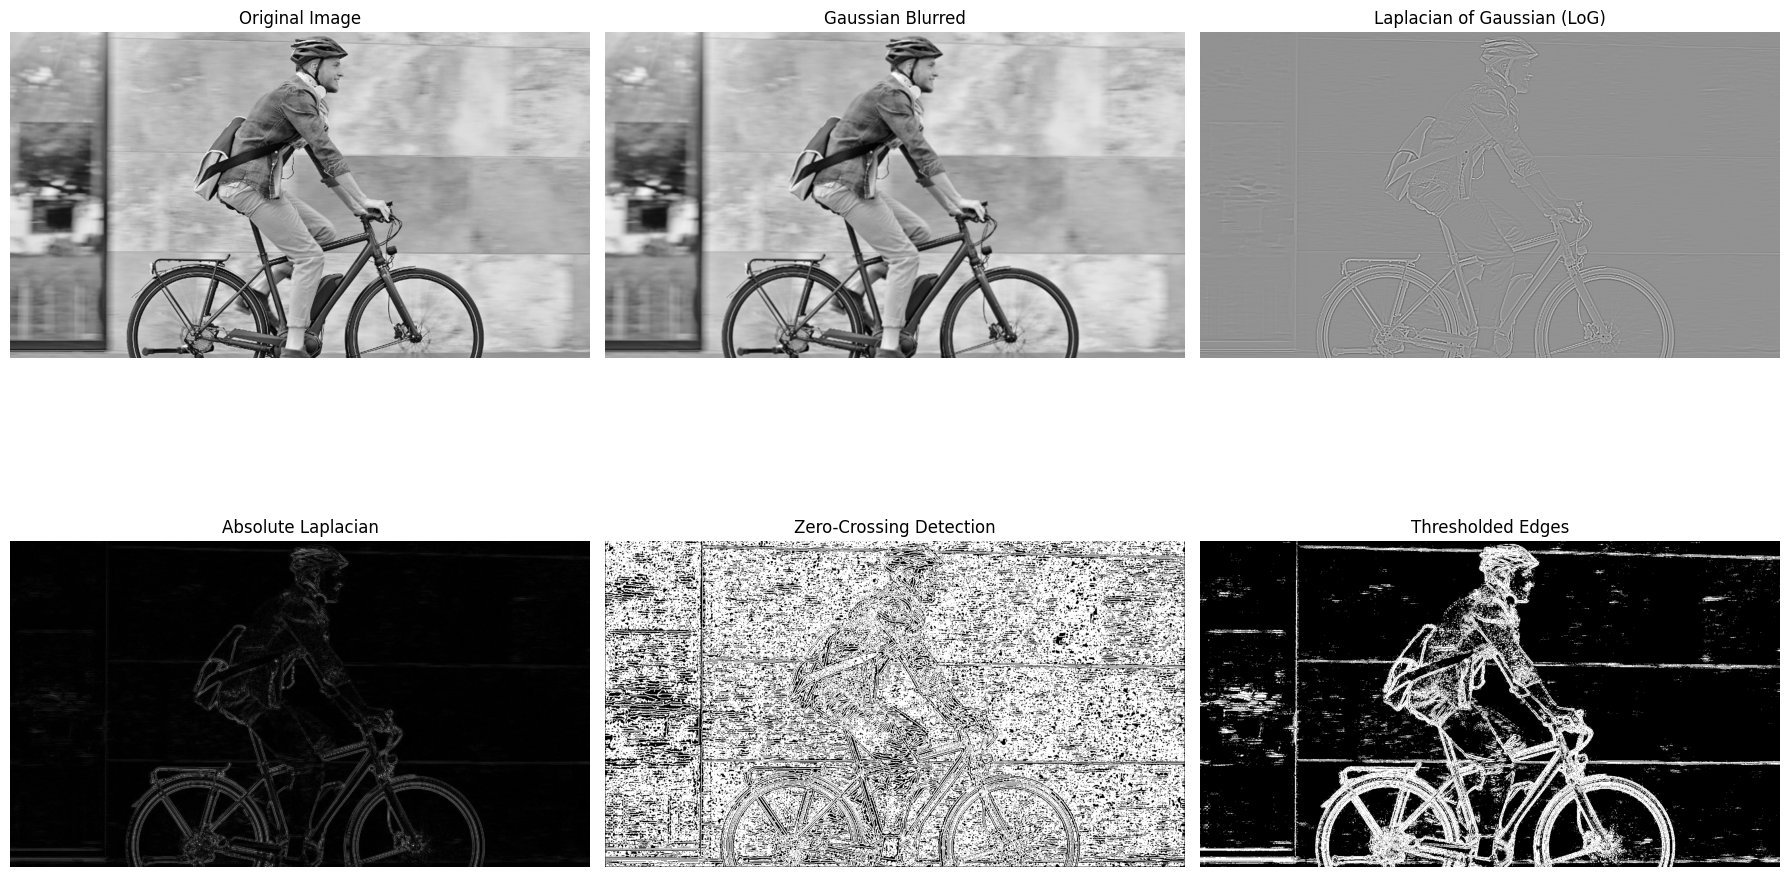

In [72]:
# Step 1: Apply Gaussian Blur
def apply_gaussian_blur(image, kernel_size=5, sigma=1.4):
    """Smooth the image using Gaussian Blur to reduce noise."""
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)

# Step 2: Compute Laplacian (FIXED)
def compute_laplacian(image):
    """Compute the Laplacian of the image. Ensure it is in uint8 format."""
    image_uint8 = (image * 255).astype(np.uint8)  # Convert to uint8
    laplacian = cv2.Laplacian(image_uint8, cv2.CV_64F, ksize=3)
    return laplacian

# Step 3: Zero-Crossing Detection
def detect_zero_crossings(laplacian):
    """Detect zero crossings in the Laplacian to find edges."""
    rows, cols = laplacian.shape
    zero_crossing = np.zeros_like(laplacian, dtype=np.uint8)

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            patch = laplacian[i-1:i+2, j-1:j+2]
            min_val, max_val = patch.min(), patch.max()

            if min_val < 0 and max_val > 0:
                zero_crossing[i, j] = 255  # Mark as an edge

    return zero_crossing

# Step 4: Thresholding (Optional)
def apply_threshold(image, threshold=10):
    """Apply thresholding to enhance strong edges."""
    return (np.abs(image) > threshold).astype(np.uint8) * 255
# Load Image
image_path = "/content/sample2.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE).astype(np.float32) / 255.0

# Apply LoG Steps
blurred_image = apply_gaussian_blur(image)
laplacian_image = compute_laplacian(blurred_image)
zero_crossings = detect_zero_crossings(laplacian_image)
thresholded_edges = apply_threshold(laplacian_image)

# Visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title("Original Image")
axes[0, 0].axis('off')

axes[0, 1].imshow(blurred_image, cmap='gray')
axes[0, 1].set_title("Gaussian Blurred")
axes[0, 1].axis('off')

axes[0, 2].imshow(laplacian_image, cmap='gray')
axes[0, 2].set_title("Laplacian of Gaussian (LoG)")
axes[0, 2].axis('off')

axes[1, 0].imshow(np.abs(laplacian_image), cmap='gray')
axes[1, 0].set_title("Absolute Laplacian")
axes[1, 0].axis('off')

axes[1, 1].imshow(zero_crossings, cmap='gray')
axes[1, 1].set_title("Zero-Crossing Detection")
axes[1, 1].axis('off')

axes[1, 2].imshow(thresholded_edges, cmap='gray')
axes[1, 2].set_title("Thresholded Edges")
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

# 3. Difference of Gaussians (DoG)

The Difference of Gaussians (DoG) is an approximation of the Laplacian of Gaussian (LoG) but computationally cheaper.

Steps:
1. Apply two Gaussian blurs with different sigmas (\sigma_1 and \sigma_2).
2. Subtract the two blurred images.

Implementation:

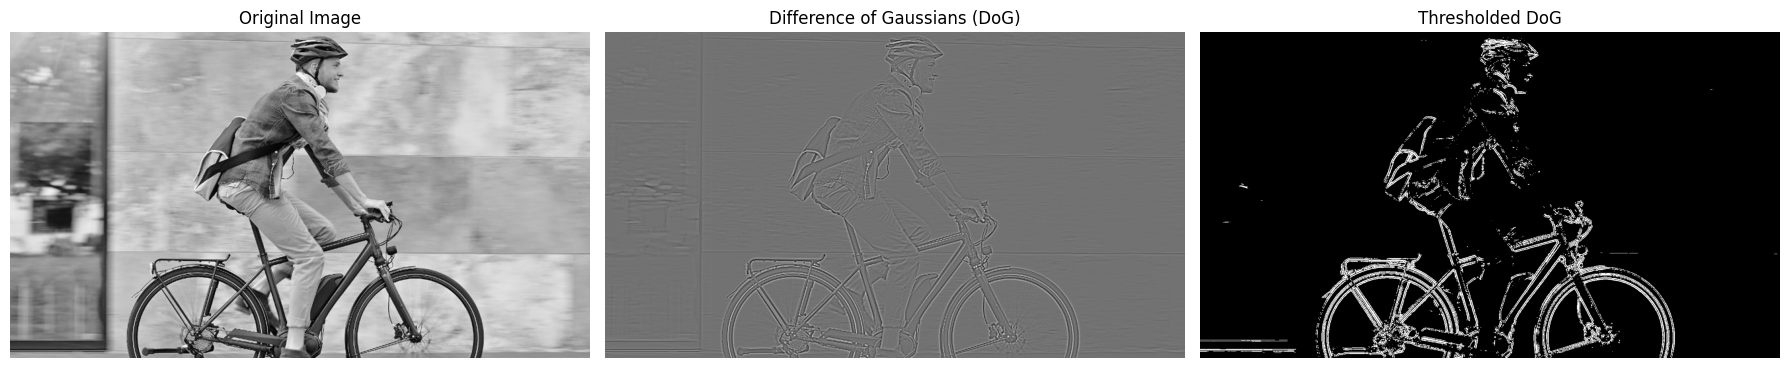

In [73]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Step 1: Apply Gaussian Blur with Different Sigmas
def apply_gaussian_blur(image, sigma):
    """Apply Gaussian Blur with a given sigma."""
    return cv2.GaussianBlur(image, (0, 0), sigma)

# Step 2: Compute DoG (Difference of Gaussians)
def compute_dog(image, sigma1=1.0, sigma2=2.0):
    """Compute Difference of Gaussians (DoG)."""
    blur1 = apply_gaussian_blur(image, sigma1)
    blur2 = apply_gaussian_blur(image, sigma2)
    dog = blur1 - blur2
    return dog

# Step 3: Apply Thresholding
def apply_threshold(image, threshold=0.05):
    """Apply thresholding to enhance strong edges."""
    return (np.abs(image) > threshold).astype(np.uint8) * 255

# Load Image
image_path = "/content/sample2.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE).astype(np.float32) / 255.0

# Apply DoG Steps
dog_image = compute_dog(image, sigma1=1.0, sigma2=2.0)
thresholded_dog = apply_threshold(dog_image)

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(dog_image, cmap='gray')
axes[1].set_title("Difference of Gaussians (DoG)")
axes[1].axis('off')

axes[2].imshow(thresholded_dog, cmap='gray')
axes[2].set_title("Thresholded DoG")
axes[2].axis('off')

plt.tight_layout()
plt.show()

# 4. Prewitt Edge Detector

Similar to Sobel, but simpler and less sensitive to diagonal edges.

Implementation:

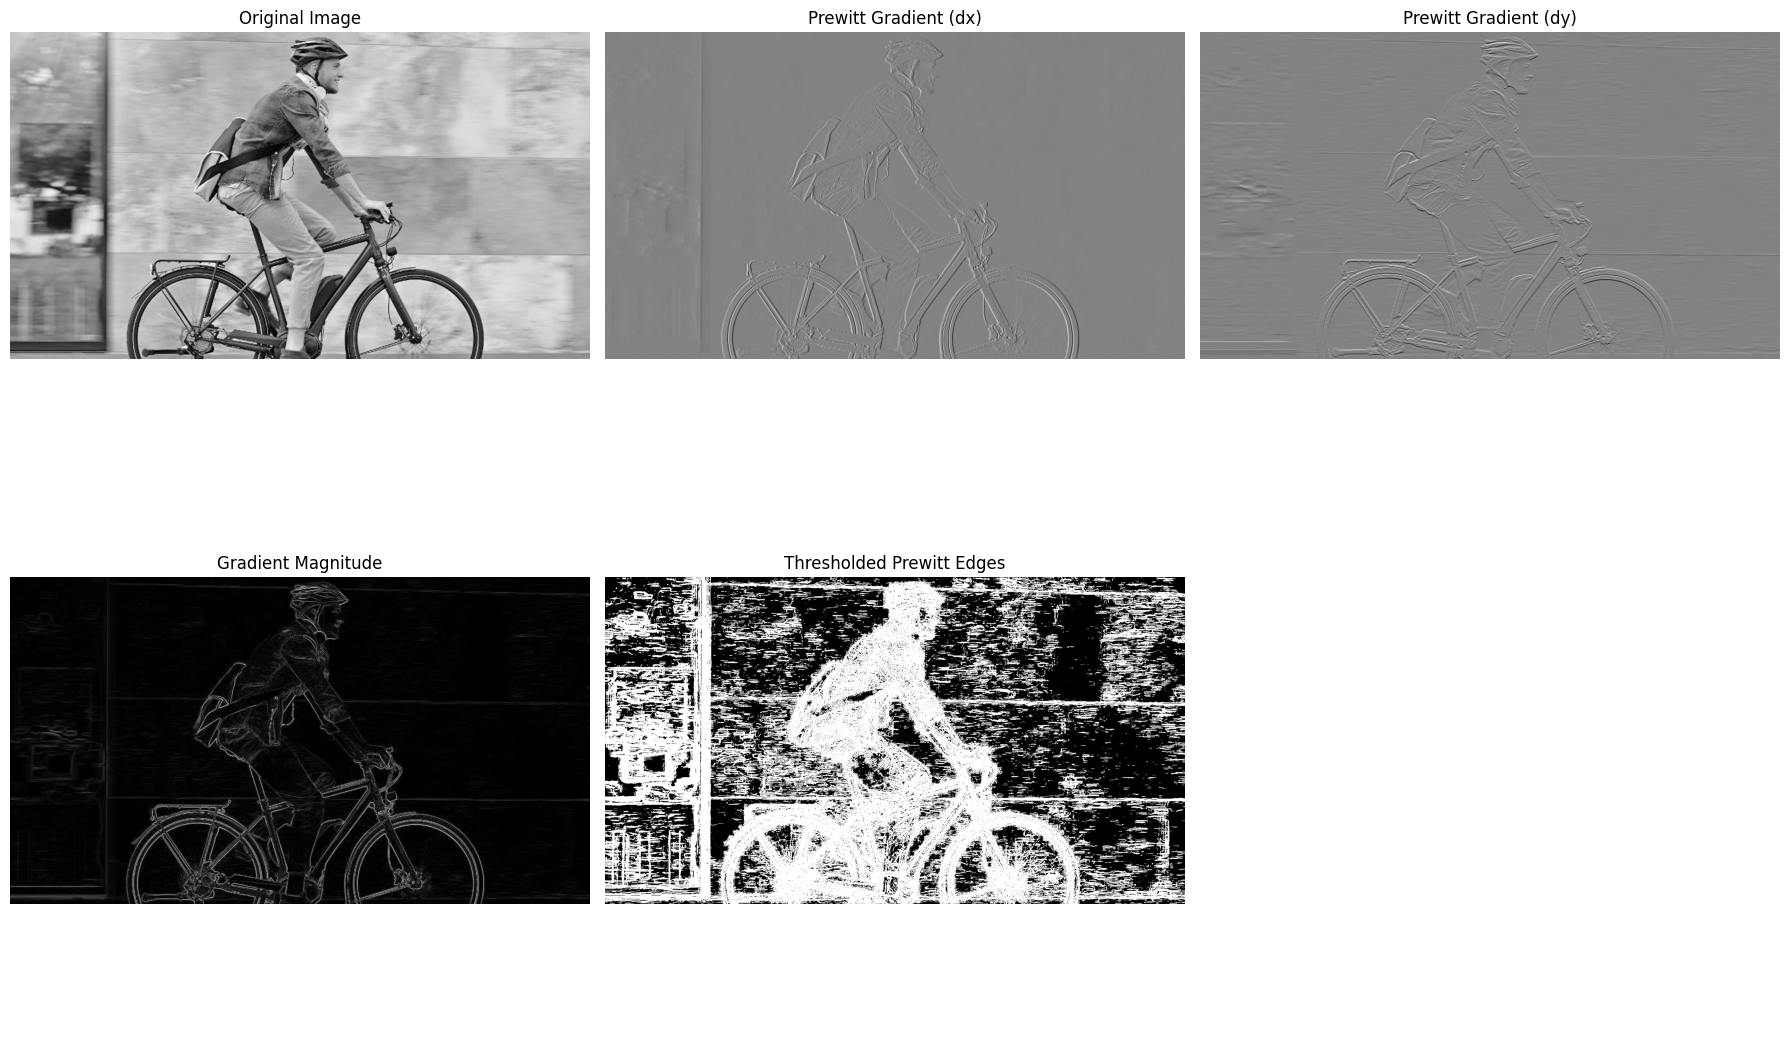

In [74]:
# Step 1: Compute Prewitt Gradient (Fixed)
def compute_prewitt_edges(image):
    """Compute edges using the Prewitt operator (Fixed for OpenCV compatibility)."""
    kernel_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])  # Horizontal
    kernel_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])  # Vertical

    # Convert to uint8 for OpenCV compatibility
    image_uint8 = (image * 255).astype(np.uint8)

    dx = cv2.filter2D(image_uint8, cv2.CV_64F, kernel_x)
    dy = cv2.filter2D(image_uint8, cv2.CV_64F, kernel_y)

    grad_magnitude = np.sqrt(dx**2 + dy**2)

    return dx, dy, grad_magnitude

# Step 2: Apply Thresholding
def apply_threshold(image, threshold=10):
    """Apply thresholding to enhance strong edges."""
    return (image > threshold).astype(np.uint8) * 255

# Apply Prewitt Edge Detection
dx_prewitt, dy_prewitt, prewitt_magnitude = compute_prewitt_edges(image)
thresholded_prewitt = apply_threshold(prewitt_magnitude)

# Visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Row 1: Prewitt Gradients
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title("Original Image")
axes[0, 0].axis('off')

axes[0, 1].imshow(dx_prewitt, cmap='gray')
axes[0, 1].set_title("Prewitt Gradient (dx)")
axes[0, 1].axis('off')

axes[0, 2].imshow(dy_prewitt, cmap='gray')
axes[0, 2].set_title("Prewitt Gradient (dy)")
axes[0, 2].axis('off')

# Row 2: Gradient Magnitude and Thresholded Output
axes[1, 0].imshow(prewitt_magnitude, cmap='gray')
axes[1, 0].set_title("Gradient Magnitude")
axes[1, 0].axis('off')

axes[1, 1].imshow(thresholded_prewitt, cmap='gray')
axes[1, 1].set_title("Thresholded Prewitt Edges")
axes[1, 1].axis('off')

axes[1, 2].axis('off')  # Empty space for alignment

plt.tight_layout()
plt.show()

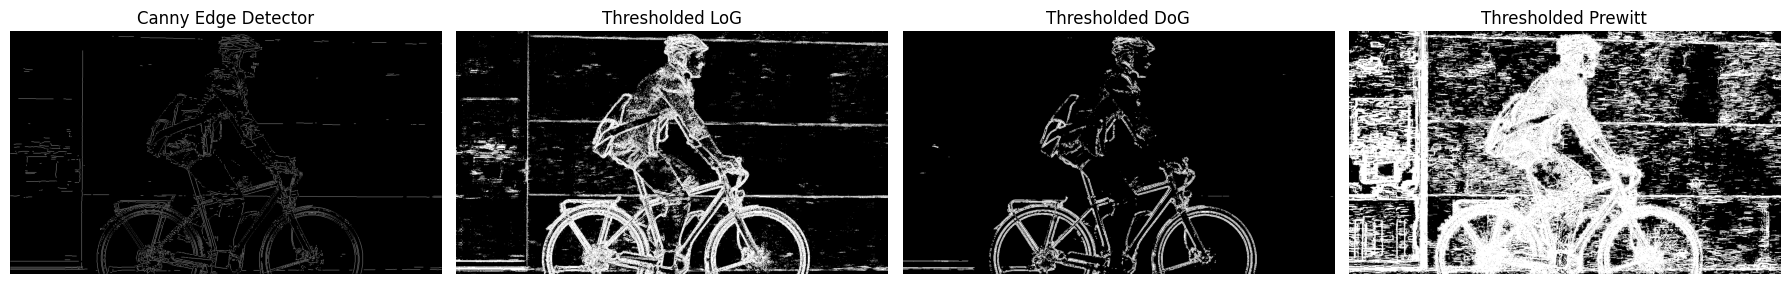

In [75]:
# ---- Visualization ----
fig, axes = plt.subplots(1, 4, figsize=(18, 6))

axes[0].imshow(final_canny_edges, cmap='gray')
axes[0].set_title("Canny Edge Detector")
axes[0].axis('off')

axes[1].imshow(thresholded_edges, cmap='gray')
axes[1].set_title("Thresholded LoG")
axes[1].axis('off')

axes[2].imshow(thresholded_dog, cmap='gray')
axes[2].set_title("Thresholded DoG")
axes[2].axis('off')

axes[3].imshow(thresholded_prewitt, cmap='gray')
axes[3].set_title("Thresholded Prewitt")
axes[3].axis('off')

plt.tight_layout()
plt.show()